#Importing the Libraries

In [1]:
!pip install Catboost
!pip install XGBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the Data

In [3]:
url = 'https://raw.githubusercontent.com/VictorHNascimento/Titanic-Machine-Learning-Competition/refs/heads/main/train.csv'
!wget {url} -O titanic_train.csv

--2025-02-18 12:50:25--  https://raw.githubusercontent.com/VictorHNascimento/Titanic-Machine-Learning-Competition/refs/heads/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2025-02-18 12:50:26 (4.50 MB/s) - ‘titanic_train.csv’ saved [61194/61194]



In [4]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Pre-processing

In [5]:
df_copy = df.copy()

titulo = []
for i in df_copy['Name']:
  t = i.split(', ')[1].split('.')[0]
  titulo.append(t)
df_copy['Title'] = titulo
df_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [6]:
#Showing the NaN data
print(df_copy.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


In [7]:
#Processing NaN data. We will not use the Booth column, so it will not be adjusted
df_copy = df_copy.dropna(subset=['Embarked'])
df_copy['Age'] = df_copy.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))
print(df_copy.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64


<ipython-input-7-dff5a721389f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Age'] = df_copy.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))


In [8]:
#Making a copy of the original data and removing unnecessary columns
df_copy = df_copy.drop(['PassengerId', 'Name','Ticket','Cabin', 'Title'], axis=1)
data_class = df_copy.pop('Survived')
df_copy['Survived'] = data_class
df_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.000000,1,0,7.2500,S,0
1,1,female,38.000000,1,0,71.2833,C,1
2,3,female,26.000000,0,0,7.9250,S,1
3,1,female,35.000000,1,0,53.1000,S,1
4,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,0
887,1,female,19.000000,0,0,30.0000,S,1
888,3,female,21.662069,1,2,23.4500,S,0
889,1,male,26.000000,0,0,30.0000,C,1


In [9]:
#Separating the Variables and the Labels
x = df_copy.iloc[:, :-1].values
y = df_copy.iloc[:, -1].values

In [10]:
print(x)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' 21.662068965517243 ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [11]:
#Encoding Categorical Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [1,6])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

#Spliting the Dataset

In [12]:
# Separando dados de treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Choosing the Best Model

In [14]:
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Classification Models
models = {
      'Random Forest': RandomForestClassifier(),
      'Logistic Regression': LogisticRegression(max_iter=600),
      'SVM': SVC(),
      'KNN': KNeighborsClassifier(),
      'Naive Bayes': GaussianNB(),
      'Decision Tree': DecisionTreeClassifier(),
      'CatBoost': CatBoostClassifier(verbose=0),
      'XGBoost': XGBClassifier()
}

# Store the results
results = []

# Training and Evaluating Each Model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    report_train = classification_report(y_train, y_pred_train, output_dict=True)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)

    results.append({
        'Model': name,
        'Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        **report_train['weighted avg'],
        **report_test['weighted avg']
    })

# Make a DataFrame with Results
df_results = pd.DataFrame(results)

# Order the df by accuracy
df_results_sorted = df_results.sort_values(by='Accuracy', ascending=False)

def style_format(val):
    if val == df_results_sorted.iloc[0]['Model']:
        color = 'green'
    elif val == df_results_sorted.iloc[1]['Model']:
        color = 'yellow'
    elif val == df_results_sorted.iloc[2]['Model']:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}; text-align: left;'

styled_df = df_results_sorted.style.applymap(style_format, subset=['Model'])
styled_df

<ipython-input-14-a5ebb76edb04>:63: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df_results_sorted.style.applymap(style_format, subset=['Model'])


,Model,Accuracy,Test Accuracy,precision,recall,f1-score,support
0,Random Forest,0.985935,0.752809,0.759975,0.752809,0.754873,178.000000
5,Decision Tree,0.985935,0.752809,0.759975,0.752809,0.754873,178.000000
7,XGBoost,0.973277,0.837079,0.837554,0.837079,0.837289,178.000000
6,CatBoost,0.908579,0.797753,0.796825,0.797753,0.797185,178.000000
3,KNN,0.867792,0.775281,0.780055,0.775281,0.776783,178.000000
2,SVM,0.849508,0.820225,0.819066,0.820225,0.817875,178.000000
1,Logistic Regression,0.801688,0.792135,0.797735,0.792135,0.793704,178.000000
4,Naive Bayes,0.796062,0.775281,0.782170,0.775281,0.777157,178.000000


#Choosing the Best Parameters

In [15]:
classifier = RandomForestClassifier()

In [16]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [10, 50, 100, 300],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)

Best Accuracy: 85.23 %
Best Parameters: {'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}


#Training the Model

In [17]:
classifier = RandomForestClassifier(**best_parameters)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       n_estimators=300, random_state=42)

#Evaluating the Training Results

In [18]:
y_pred = classifier.predict(x_test)

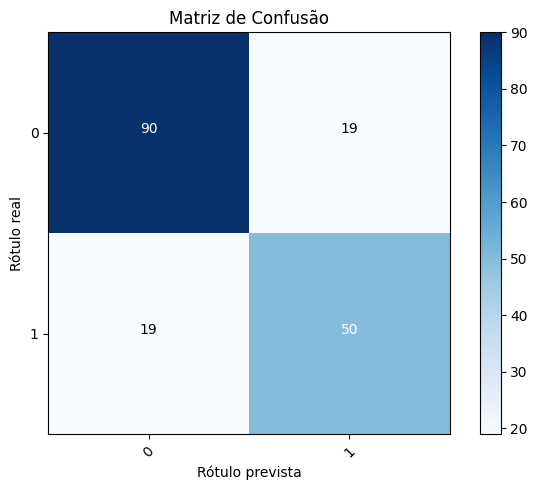

In [19]:
#Plot da Matriz de Confusão
def plotMatriz(classificador, y, y2, cmap = plt.cm.Blues, normalize = False):
  from sklearn.metrics import confusion_matrix
  import itertools
  cm = confusion_matrix(y, y2)
  classes = classificador.classes_
  title = 'Matriz de Confusão'

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('Rótulo real')
  plt.xlabel('Rótulo prevista')

plotMatriz(classifier, y_test, y_pred)

In [20]:
from sklearn.metrics import accuracy_score, classification_report
print("Classification Report do Teste:\n", classification_report(y_test, y_pred))

Classification Report do Teste:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.72      0.72      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



#Training Again With All Data

In [21]:
classifier = RandomForestClassifier(**best_parameters)
x = sc.fit_transform(x)
classifier.fit(x, y)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       n_estimators=300, random_state=42)

#Predicting New Values

In [22]:
url = 'https://raw.githubusercontent.com/VictorHNascimento/Titanic-Machine-Learning-Competition/refs/heads/main/test.csv'
!wget {url} -O titanic_prediction.csv

--2025-02-18 12:57:03--  https://raw.githubusercontent.com/VictorHNascimento/Titanic-Machine-Learning-Competition/refs/heads/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/plain]
Saving to: ‘titanic_prediction.csv’

titanic_prediction. 100%[===================>]  27.96K  --.-KB/s    in 0.003s  

2025-02-18 12:57:04 (9.35 MB/s) - ‘titanic_prediction.csv’ saved [28629/28629]



In [23]:
df_pred = pd.read_csv('titanic_prediction.csv')

titulo = []
for i in df_pred['Name']:
  t = i.split(', ')[1].split('.')[0]
  titulo.append(t)
df_pred['Title'] = titulo
df_pred

id = df_pred['PassengerId'].to_list()
df_pred

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [24]:
#Showing the NaN data
print(df_pred.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [25]:
#Processing the NaN data
df_pred['Fare'] = df_pred.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))
df_pred['Age'] = df_pred.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))
if df_pred['Age'].isnull().sum():
  df_pred['Age'] = df_pred['Age'].fillna(df_pred['Age'].mean())
print(df_pred.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64


In [26]:
df_pred = df_pred.drop(['Name','Ticket','Cabin','Title'], axis=1)

In [27]:
#Separating the Variables and the Labels
features = df_pred.iloc[:, 1:].values

In [28]:
print(features)

[[3 'male' 34.5 ... 0 7.8292 'Q']
 [3 'female' 47.0 ... 0 7.0 'S']
 [2 'male' 62.0 ... 0 9.6875 'Q']
 ...
 [3 'male' 38.5 ... 0 7.25 'S']
 [3 'male' 32.0 ... 0 8.05 'S']
 [3 'male' 7.406470588235294 ... 1 22.3583 'C']]


In [29]:
#Encoding Categorical Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [1,6])], remainder='passthrough')
features = np.array(ct.fit_transform(features))
features = sc.transform(features)

In [30]:
sub = []
predict = classifier.predict(features)
for i in range(len(predict)):
  sub.append([id[i],predict[i]])
print(sub)

[[892, 0], [893, 0], [894, 0], [895, 0], [896, 1], [897, 0], [898, 1], [899, 0], [900, 1], [901, 0], [902, 0], [903, 0], [904, 1], [905, 0], [906, 1], [907, 1], [908, 0], [909, 0], [910, 0], [911, 1], [912, 0], [913, 0], [914, 1], [915, 0], [916, 1], [917, 0], [918, 1], [919, 0], [920, 1], [921, 0], [922, 0], [923, 0], [924, 1], [925, 0], [926, 1], [927, 0], [928, 0], [929, 0], [930, 0], [931, 1], [932, 0], [933, 1], [934, 0], [935, 1], [936, 1], [937, 0], [938, 0], [939, 0], [940, 1], [941, 1], [942, 0], [943, 0], [944, 1], [945, 1], [946, 0], [947, 0], [948, 0], [949, 0], [950, 0], [951, 1], [952, 0], [953, 0], [954, 0], [955, 1], [956, 1], [957, 1], [958, 1], [959, 0], [960, 0], [961, 1], [962, 1], [963, 0], [964, 0], [965, 0], [966, 1], [967, 0], [968, 0], [969, 1], [970, 0], [971, 1], [972, 1], [973, 0], [974, 0], [975, 0], [976, 0], [977, 0], [978, 1], [979, 0], [980, 1], [981, 1], [982, 0], [983, 0], [984, 1], [985, 0], [986, 0], [987, 0], [988, 1], [989, 0], [990, 0], [991, 0],

In [31]:
len(features)

418

#Generating the CSV for Submission

In [32]:
csv = pd.DataFrame(sub, columns=['PassengerId', 'Survived'])
csv.to_csv('submission.csv', index=False)